In [2]:
from func import *
from PIL import Image
import numpy as np
import imageio
import matplotlib.pyplot as plt
import random as rnd
import os
import cv2
from keras.models import Sequential
#нейронная сеть, слои которой соединены друг с другом
from sklearn.metrics import classification_report
from keras.layers import Dense
#тип слоев, когда нейроны предыдущего уровня соединяются со всеми нейронами следующего уровня

from keras.utils import np_utils
#утилиты для numpy

from sklearn.model_selection import train_test_split

from IPython.display import display, clear_output

In [3]:
rnd.seed(30)

## Создаем массивы картинок букв и цифр и правильные ответы к ним. Загружаем в папку "parse_img_no_counturs".

In [4]:
import tensorflow
import keras

In [135]:

data_let = []
data_num = []
ans_let = []
ans_num = []

In [136]:
X_train_num = []
X_test_num = []
X_train_let = []
X_test_let = []
y_train_num = []
y_test_num = []
y_train_let = []
y_test_let = []

In [137]:
path = os.path.abspath("")
ALL_names = os.listdir(path + "/img")
yy = [0 for i in range(len(ALL_names))]#костыль
picture_id = [0,1,2,3,4,5]

TRAIN_names, TEST_names, y_123, y_321 = train_test_split(ALL_names, yy, test_size=0.3, train_size=0.7)


In [138]:
%%time

print(len(TRAIN_names))
for i in TRAIN_names:
    #pic = imageio.imread(path + "/" + "parse_img_no_counturs/" + i)
    for j in picture_id:
        name = i[0:8] + "_" + str(j) +".png"
        #print(name)
        pic = imageio.imread(path + "/" + "parse_img_no_counturs/" + name)
        if int(j) == 0 or int(j) == 4 or int(j) == 5:
            X_train_let.append(pic.reshape(-1))
            y_train_let.append(i[int(j)])
            #plot_image(pic)
        else:
            X_train_num.append(pic.reshape(-1))
            y_train_num.append(i[int(j)])
            
#len(np.unique(TEST_names+TRAIN_names))

7573
CPU times: user 8.39 s, sys: 388 ms, total: 8.78 s
Wall time: 8.78 s


## Обучение нейронных сетей.

Выбираем размер тестовой выборки, 30% от всего dataset. Категоризуем буквы, записываем в массив вида: картинка, буква(в кодировке). Далее задаем параметры нейросети. Для чисел четырехслойная с функциями активации гипреболический тангенс, relu, selu, softmax, для букв двухслойная - гиперболический тангенс, softmax. Они были подобраны из гугла, как самые используемые и подходящие. Далее обучение, score = правильные ответы/все ответы.

In [139]:
from sklearn.preprocessing import LabelBinarizer
Y = np_utils.to_categorical(y_train_num)


letters = np.unique(y_train_let)
print(letters)
Y1 = LabelBinarizer(neg_label=0, pos_label=1,sparse_output=False)
Y1.fit(letters)
print(Y1.classes_)
Y1 = Y1.transform(y_train_let)

['A' 'B' 'C' 'E' 'H' 'K' 'M' 'O' 'P' 'T' 'X' 'Y']
['A' 'B' 'C' 'E' 'H' 'K' 'M' 'O' 'P' 'T' 'X' 'Y']


In [140]:
model_let = Sequential()
model_num = Sequential()

In [141]:
model_num.add(Dense(800, input_dim=3468, init="normal", activation="tanh"))
model_num.add(Dense(800, input_dim=800, init="normal", activation="relu"))
model_num.add(Dense(1000, input_dim=800, init="normal", activation="selu"))

model_let.add(Dense(800, input_dim=3468, init="normal", activation="tanh"))
clear_output()

In [142]:
model_num.add(Dense(9, init="normal", activation="softmax"))
model_let.add(Dense(Y1.shape[1], init="normal", activation="softmax"))
clear_output()

In [143]:
model_let.compile(loss="categorical_crossentropy", 
               optimizer="SGD", 
               metrics=["accuracy"])

In [144]:
model_num.compile(loss="categorical_crossentropy", 
               optimizer="SGD", 
               metrics=["accuracy"])


In [145]:
print(model_num.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 800)               2775200   
_________________________________________________________________
dense_58 (Dense)             (None, 800)               640800    
_________________________________________________________________
dense_59 (Dense)             (None, 1000)              801000    
_________________________________________________________________
dense_61 (Dense)             (None, 9)                 9009      
Total params: 4,226,009
Trainable params: 4,226,009
Non-trainable params: 0
_________________________________________________________________
None


In [146]:
%%time
model_let.fit(np.array(X_train_let), Y1, batch_size=15000, epochs=750,
         verbose=1)
clear_output()

CPU times: user 2min 24s, sys: 1min 15s, total: 3min 39s
Wall time: 4min 23s


In [147]:
%%time
model_num.fit(np.array(X_train_num), Y, batch_size=15000, epochs=750,
         verbose=1)

clear_output()

CPU times: user 3min 29s, sys: 1min 37s, total: 5min 6s
Wall time: 6min 24s


In [102]:
HIST_LET = model_let.history
HIST_NUM = model_num.history



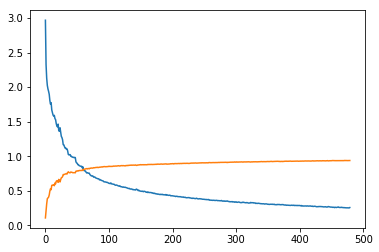

In [148]:
plt.plot(HIST_LET.history['loss'])
plt.plot(HIST_LET.history['acc'])

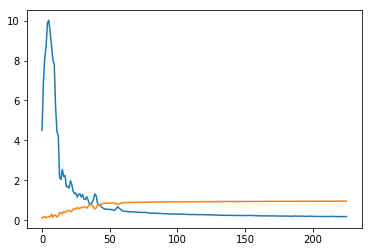

In [149]:
plt.plot(HIST_NUM.history['loss'])
plt.plot(HIST_NUM.history['acc'])

In [150]:
letters = np.unique(y_train_let)


In [151]:
k1 = 0
k2 = 0
k3 = 0
n1 = len(TEST_names)

In [152]:

print(len(TEST_names))

aa = 0
for i in TEST_names:
    t = 0
    for j in picture_id:
        name = i[0:8] + "_" + str(j) +".png"
        #print(name)
        pic = imageio.imread(path + "/" + "parse_img_no_counturs/" + name)
        
        if int(j) == 0 or int(j) == 4 or int(j) == 5:
            ara = np.array(pic.reshape(-1))
            e = model_let.predict(np.array(pic.reshape(1,-1)))
            
            if name[int(j)] == letters[e.argmax()]:
                t+=1
            #X_test_let.append(pic.reshape(-1))
            #y_test_let.append(i[int(j)])
            #plot_image(pic)
        else:
            ara = np.array(pic.reshape(-1))
            e = model_num.predict(np.array(pic.reshape(1,-1)))
            if int(name[int(j)]) == int(e.argmax()):
                t+=1
            
    if t == 6:
        k1+=1
    if t == 5  or t == 6:
        k2+=1
    if t == 4 or t == 5 or t == 6:
        k3+=1
        
    
    

3246


In [153]:
(k1/n1, k2/n1, k3/n1)

(0.8324091189155884, 0.9571780653111522, 0.98120764017252)

In [157]:
print(len(TEST_names))
for i in TEST_names:
    #pic = imageio.imread(path + "/" + "parse_img_no_counturs/" + i)
    for j in picture_id:
        name = i[0:8] + "_" + str(j) +".png"
        #print(name)
        pic = imageio.imread(path + "/" + "parse_img_no_counturs/" + name)
        if int(j) == 0 or int(j) == 4 or int(j) == 5:
            X_test_let.append(pic.reshape(-1))
            y_test_let.append(i[int(j)])
            #plot_image(pic)
        else:
            X_test_num.append(pic.reshape(-1))
            y_test_num.append(i[int(j)])

3246


In [159]:

#print((X_test_let))
pred_let = model_let.predict(np.array(X_test_let))
pred_num = model_num.predict(np.array(X_test_num))
Y = np.array(y_test_num)
Y1 = np.array(y_test_let)
pred_let.shape
Y1



array(['H', 'M', 'C', ..., 'C', 'K', 'E'], dtype='<U1')

In [160]:
suma = 0
for i in range(pred_let.shape[0]):
    if letters[(pred_let.argmax(axis=1)[i])] == (Y1[i]):
        suma += 1

In [161]:
print("SCORE_LET", suma/pred_let.shape[0])

SCORE_LET 0.9446498254261655


In [162]:
suma = 0
for i in range(pred_num.shape[0]):
    if int(pred_num.argmax(axis=1)[i]) == int(Y[i]):
        suma += 1

In [163]:
print("SCORE_NUM", suma/pred_num.shape[0])

SCORE_NUM 0.9747381392483057


In [201]:
y_true_num = [int(i) for i in y_test_num]
y_pred_num = [int(i) for i in pred_num.argmax(axis = 1)]
target_names = ['0','1','2','3','4','5','6','7','8']
print(classification_report(y_true_num, y_pred_num))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1078
           1       0.98      0.98      0.98      1135
           2       0.98      0.97      0.98      1002
           3       0.97      0.95      0.96      1092
           4       0.97      0.99      0.98      1091
           5       0.97      0.98      0.97      1054
           6       0.97      0.98      0.98      1103
           7       0.98      0.98      0.98      1092
           8       0.97      0.96      0.97      1091

   micro avg       0.97      0.97      0.97      9738
   macro avg       0.97      0.97      0.97      9738
weighted avg       0.97      0.97      0.97      9738



In [202]:
y_true_let = [i for i in y_test_let]
y_pred_let = [i for i in letters[pred_let.argmax(axis = 1)]]
target_names = letters
print(classification_report(y_true_let, y_pred_let, target_names=target_names))


              precision    recall  f1-score   support

           A       0.99      0.97      0.98       842
           B       0.94      0.92      0.93       767
           C       0.91      0.93      0.92       863
           E       0.94      0.93      0.93       808
           H       0.93      0.96      0.94       803
           K       0.95      0.92      0.93       791
           M       0.96      0.97      0.97       803
           O       0.93      0.90      0.92       819
           P       0.97      0.98      0.97       810
           T       0.98      0.97      0.98       846
           X       0.95      0.94      0.94       785
           Y       0.89      0.95      0.92       801

   micro avg       0.94      0.94      0.94      9738
   macro avg       0.94      0.94      0.94      9738
weighted avg       0.95      0.94      0.94      9738



In [ ]:
model_num.add(Dense(128, input_dim=3468, init="normal", activation="tanh"))
model_num.add(Dense(64, input_dim=128, init="normal", activation="relu"))
model_num.add(Dense(32, input_dim=64, init="normal", activation="selu"))

model_let.add(Dense(238, input_dim=3468, init="normal", activation="tanh"))
model_let.add(Dense(100, input_dim=238, init="normal", activation="relu"))
clear_output()